# Performance Technical Strategy

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get data Reports

In [108]:


# URL ของ Google Sheets
url = "https://docs.google.com/spreadsheets/d/1M2J41NhgnGg0SxwIskfqQRSHmYGtRlT6ztNaQm64lsE/export?format=csv"

# อ่านไฟล์ CSV
df = pd.read_csv(
    'Reports - Technical Strategy.csv')

# แสดงข้อมูล
df

,Strategy,Time frame,Deposit,margin,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],...,Win Rate [%],Best Trade [%],Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_strategy
0,Simple moving average crossover,D1,10000,1/100,2007-01-01 0:00:00,2023-03-10 0:00:00,5912 days 00:00:00,0.694031,19998.067450,20016.35323,...,50.000000,1.298639,-1.168618,-0.020749,2 days 00:00:00,1 days 00:00:00,0.935641,-0.018847,-0.043339,SMA_crossover
1,Simple moving average crossover,H4,10000,1/100,2007-01-01 0:00:00,2023-03-10 16:00:00,5912 days 16:00:00,1.000924,9923.665121,10014.17234,...,50.931677,0.765704,-1.288562,-0.028091,2 days 12:00:00,0 days 05:00:00,0.816971,-0.027596,-1.459318,SMA_crossover
2,Simple moving average crossover,H1,10000,1/100,2007-01-01 0:00:00,2023-03-10 17:00:00,5912 days 17:00:00,0.955551,9757.242367,10000.77416,...,46.315789,0.498501,-0.513722,-0.030971,2 days 06:00:00,0 days 02:00:00,0.660422,-0.030831,-4.576014,SMA_crossover
3,Simple moving average crossover,M30,10000,1/100,2007-01-01 0:00:00,2023-03-10 17:30:00,5912 days 17:30:00,1.536594,9555.118201,10001.02322,...,47.063758,0.482738,-0.734314,-0.029608,3 days 05:00:00,0 days 01:51:00,0.624291,-0.029511,-7.187288,SMA_crossover
4,Short term breakout with RSI,D1,10000,1/100,2007-01-01 0:00:00,2023-03-10 0:00:00,5912 days 00:00:00,3.648622,9808.731901,10004.08130,...,42.483660,2.644459,-2.611217,-0.087668,2 days 00:00:00,1 days 00:00:00,0.774207,-0.084921,-1.586304,Breakout_RSI
5,Short term breakout with RSI,H4,10000,1/100,2007-01-01 0:00:00,2023-03-10 16:00:00,5912 days 16:00:00,4.877579,9487.827439,10004.85582,...,44.206549,0.980448,-1.425178,-0.058216,3 days 00:00:00,0 days 04:00:00,0.656965,-0.057748,-4.480931,Breakout_RSI
6,Short term breakout with RSI,H1,10000,1/100,2007-01-01 0:00:00,2023-03-10 17:00:00,5912 days 17:00:00,5.478082,9020.249482,10001.53820,...,47.533175,0.921731,-0.791587,-0.024955,3 days 01:00:00,0 days 02:00:00,0.704116,-0.024829,-8.512150,Breakout_RSI
7,Short term breakout with RSI,M30,10000,1/100,2007-01-01 0:00:00,2023-03-10 17:30:00,5912 days 17:30:00,5.958399,7974.441062,10001.59156,...,46.626486,0.528740,-0.583220,-0.025035,3 days 05:00:00,0 days 01:08:00,0.611987,-0.024966,-17.170174,Breakout_RSI
8,Inside bar,D1,10000,1/100,2007-01-01 0:00:00,2023-03-10 0:00:00,5912 days 00:00:00,1.744993,9877.137592,10017.67649,...,44.776119,1.143480,-1.074126,-0.117509,4 days 00:00:00,1 days 00:00:00,0.667051,-0.115705,-1.837531,Inside_Bar
9,Inside bar,H4,10000,1/100,2007-01-01 0:00:00,2023-03-10 16:00:00,5912 days 16:00:00,2.821836,9819.683965,10014.65980,...,50.097466,0.566989,-1.230202,-0.027383,2 days 20:00:00,0 days 02:00:00,0.809830,-0.027007,-2.146625,Inside_Bar


In [110]:
df['Win Rate [%]'] = df['Win Rate [%]'].fillna(0).astype(int)

## Win Rate [%]

In [114]:
win_rate_h4 = df.loc[df['Time frame'] == 'H4', 'Win Rate [%]']
win_rate_h1 = df.loc[df['Time frame'] == 'H1', 'Win Rate [%]']
win_rate_d1 = df.loc[df['Time frame'] == 'D1', 'Win Rate [%]']
win_rate_m30 = df.loc[df['Time frame'] == 'M30', 'Win Rate [%]']

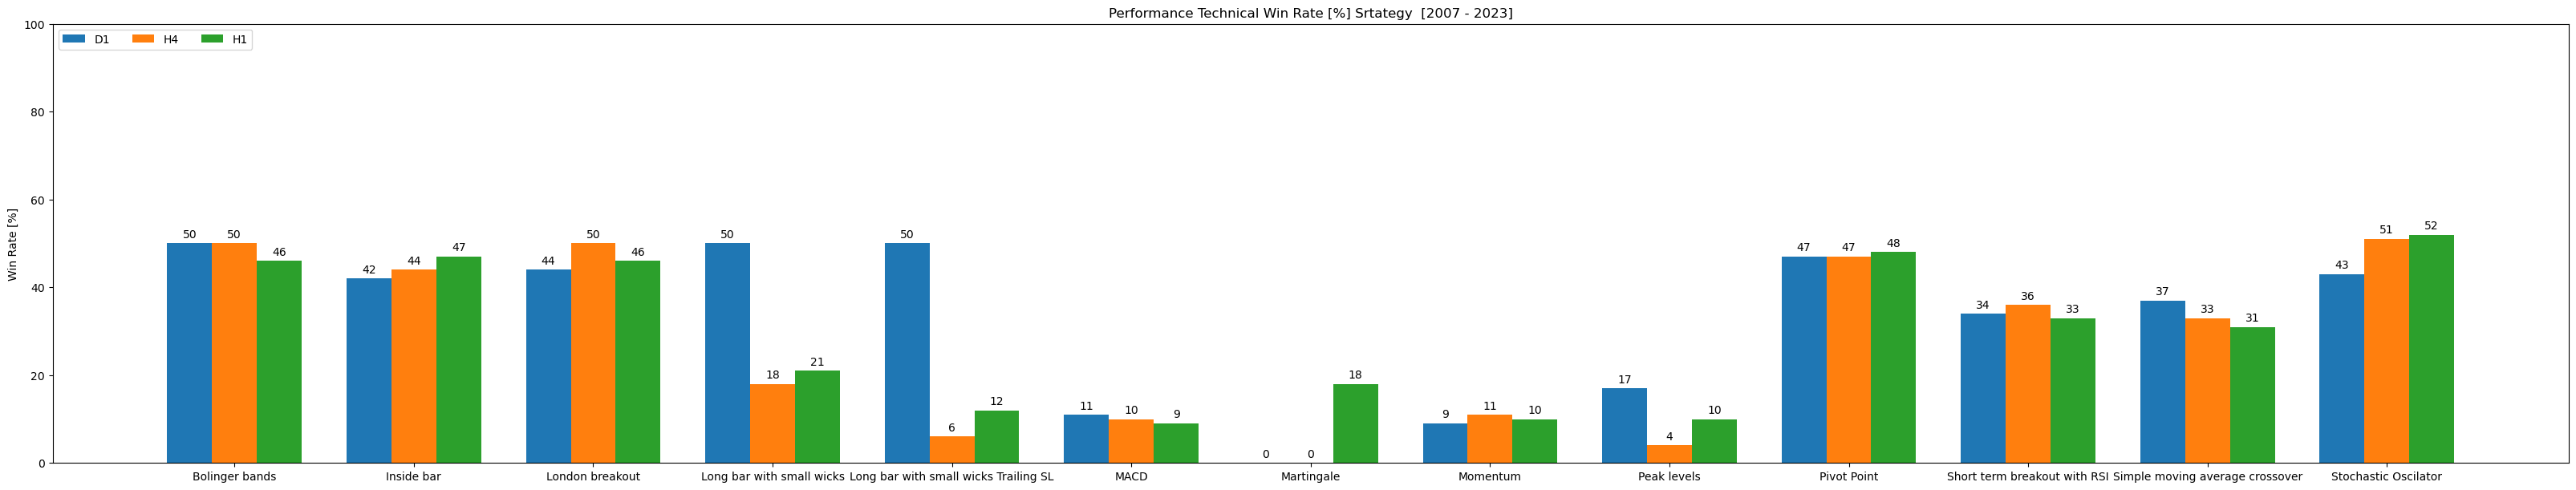

In [117]:
original = np.array(df['Strategy'])
strategies = np.unique(original)
x = np.arange(len(strategies))
timeframe = {
    'D1': win_rate_d1,
    'H4': win_rate_h4,
    'H1': win_rate_h1,
    # 'M30': win_rate_m30,
}
width = 0.25  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained' , figsize=(32,6))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement , width, label= TF)
    ax.bar_label(rects, padding= 3 ) 
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win Rate [%]')
ax.set_title('Performance Technical Win Rate [%] Srtategy  [2007 - 2023]')
ax.set_xticks(x + width, strategies)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()
    

In [23]:
x

array(13)